## Indice
<a id =tt> </a> <br>

## Notebook Content
1. [Load Libraries](#0)
1. [Load Data](#1)
1. [Cleaning, Preprocessing and Feature Engineering (columns)](#2)
    1. [Ever Married](#2.2)
    1. [Age](#2.3)
    1. [Work Experience](#2.4)
    1. [Family Size](#2.6)
    1. [Dummificacion](#2.5)
    1. [Outliers](#4)
    1. [Data Visualization](#3)    
    1. [Data Information I](#5.1)
    1. [Data Information II](#5.2)    
 1. [Evaluation protocols](#6)
    1. [holdOut](#6.1)
    1. [Evaluation metrics](#6.2)   
1. [Modelos](#6)
    1. [Baseline](#6.0)
    1. [KNNClasifier](#7.1)
    1. [DecisionTreeClassifier](#7.2)
    1. [BaggingClassifier](#7.3)

<a id=999> </a> <br>

Información de los atributos:
1. ID: ID único
2. Gender: Género del cliente
3. Ever_Married Estado civil del cliente
4. Age: Edad del cliente
5. Graduated: ¿El cliente es un graduado?
6. Professión: Profesión del cliente
7. Work_Experience: Experiencia laboral en años
8. Spending_Score: Puntuación de gasto del cliente
9. Family_Size: Número de miembros de la familia del cliente (incluido el cliente)
10. Var_1: Categoría anónima para el cliente
11. Segmentation (objetivo): Segmento del cliente

<a id=0> </a> <br>

## <span style="background:gray; color:white">1. </span><span style="">Load Libraries </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

from scipy.stats import pearsonr,spearmanr, kendalltau
from statsmodels.compat import lzip
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
encoder = LabelEncoder()


from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
import itertools
from yellowbrick.classifier import ROCAUC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors,tree, metrics
from sklearn.model_selection import KFold,cross_validate,StratifiedKFold, RepeatedKFold, LeaveOneOut

from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V



<a id=1> </a> <br>

## <span style="background:gray; color:white">2. </span><span style="">Load Data </span>

In [2]:
train = pd.read_csv('Data/Train.csv')
test =  pd.read_csv('Data/Test.csv')

In [3]:
print(f'TRAIN: \n-Registros: {train.shape[0]}\n-Variable: {train.shape[1]}\n\nTEST: \n-Registros: {test.shape[0]}\n-Variable: {test.shape[1]}')

TRAIN: 
-Registros: 8068
-Variable: 11

TEST: 
-Registros: 2627
-Variable: 11


Steps [Double CLick to Check]
<!-- ## TRAIN
### PDTE crear funcion para llamar en pipeline 
# describe
# head
# null
# info
# value_count 
#train['Ever_Married'] = train.apply(lambda x: "No" if x.Family_Size==1, axis=1)
-->

<a id=2> </a> <br>

## <span style="background:gray; color:white">3. </span><span style="">Cleaning, Preprocessing and Feature Engineering </span>

In [4]:
#TRAIN
train.head(15)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


Basado en la [informacion de los atributos](#999) usamos el ID como indice de la tabla

In [5]:
#train.set_index('ID', inplace=True)

In [6]:
train.describe(include="all")

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [8]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


<a id=2.1> </a> <br>

## <span style="background:gray; color:white">3.1 </span><span style="">Missing Values</span>

In [9]:
train.isnull().sum()[np.where(train.isnull().sum() != 0)[0]]

Ever_Married       140
Graduated           78
Profession         124
Work_Experience    829
Family_Size        335
Var_1               76
dtype: int64

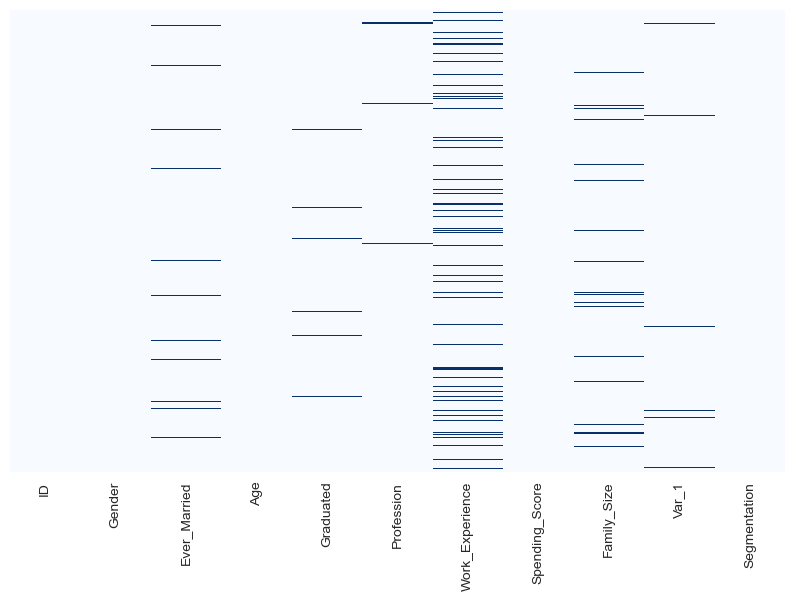

In [10]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [11]:
train['Gender'].isnull().sum(),train['Gender'].value_counts(),train['Gender'].value_counts('percentage')

(0,
 Male      4417
 Female    3651
 Name: Gender, dtype: int64,
 Male      0.547471
 Female    0.452529
 Name: Gender, dtype: float64)

<Axes: >

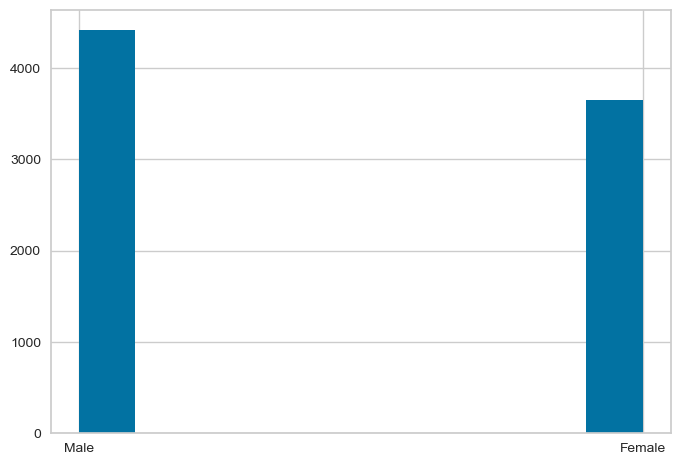

In [12]:
train['Gender'].hist()

In [13]:
tabla_freq=(pd.crosstab(index=train["Gender"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,Gender,Freq. Abs.,Freq. Rel.
0,Male,4417,0.547471
1,Female,3651,0.452529


<a id=2.2> </a> <br>

## <span style="background:gray; color:white">3.2 </span><span style="">Ever_Married</span>

In [14]:
tabla_freq=(pd.crosstab(index=train["Ever_Married"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,Ever_Married,Freq. Abs.,Freq. Rel.
0,Yes,4643,0.585646
1,No,3285,0.414354


In [15]:
print('TIENE NULOS\n', train['Ever_Married'].isnull().value_counts())

TIENE NULOS
 False    7928
True      140
Name: Ever_Married, dtype: int64


In [16]:
train['Ever_Married'].isnull().sum()

140

In [17]:
train[train['Ever_Married'].isnull() == True]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
24,461021,Female,NaN,58,No,Executive,1.0,Average,3.0,Cat_3,B
108,466466,Female,NaN,19,No,Healthcare,6.0,Low,5.0,Cat_3,D
201,466065,Male,NaN,19,No,Healthcare,9.0,Low,3.0,Cat_3,D
213,460516,Female,NaN,85,No,Lawyer,0.0,High,1.0,Cat_3,C
272,464841,Male,NaN,19,No,Entertainment,0.0,High,3.0,Cat_4,D
...,...,...,...,...,...,...,...,...,...,...,...
7756,465987,Male,NaN,20,No,Healthcare,1.0,Low,3.0,Cat_2,D
7775,462989,Male,NaN,32,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8011,466026,Female,NaN,49,No,Entertainment,0.0,Low,1.0,Cat_3,A
8030,459082,Male,NaN,45,Yes,Artist,1.0,Low,NaN,Cat_6,A


In [18]:
#Revisamos la moda de esta columna
train['Ever_Married'].mode()

0    Yes
Name: Ever_Married, dtype: object

In [19]:
# Generamos una copia para poder hacer imputacion RANDOMICA
df = train.copy()
null_indices = df['Ever_Married'].isnull()
random_values = np.random.choice(['Yes', 'No'], size=null_indices.sum())
df.loc[null_indices, 'Ever_Married'] = random_values

<Axes: >

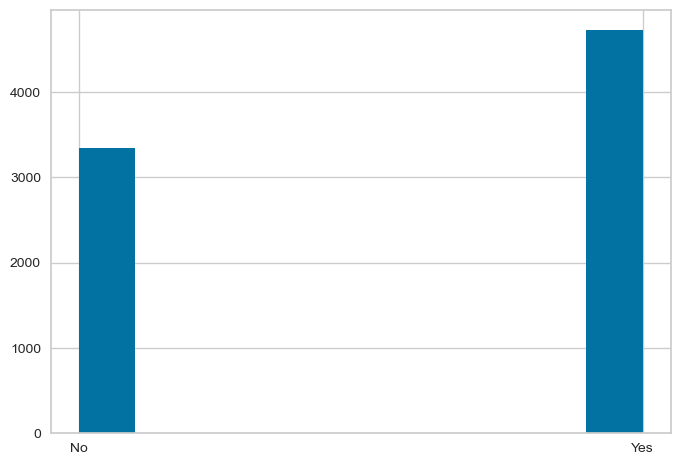

In [20]:
df['Ever_Married'].hist()

In [21]:
# Nuevamente la moda de la copia
df['Ever_Married'].mode()[0]

'Yes'

In [22]:
#aplicamos valores imputados en el dataset original
train.loc[null_indices, 'Ever_Married'] = random_values

In [23]:
#Codificamos la columna para poder usar en modelos 
train['Ever_Married'] = encoder.fit_transform(train['Ever_Married'])

<Axes: >

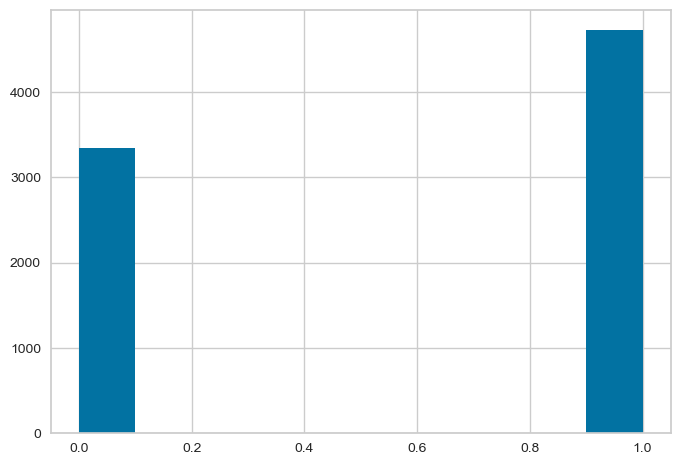

In [24]:
train['Ever_Married'].hist()

In [25]:
train.isnull().sum()[np.where(train.isnull().sum() != 0)[0]]

Graduated           78
Profession         124
Work_Experience    829
Family_Size        335
Var_1               76
dtype: int64

In [26]:
tabla_freq=(pd.crosstab(index=train["Ever_Married"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,Ever_Married,Freq. Abs.,Freq. Rel.
0,1,4725,0.585647
1,0,3343,0.414353


<a id=2.3> </a> <br>

## <span style="background:gray; color:white">3.3 </span><span style="">Rangos de Edad y Edad</span>

In [27]:
df['Age'].isna().sum()

0

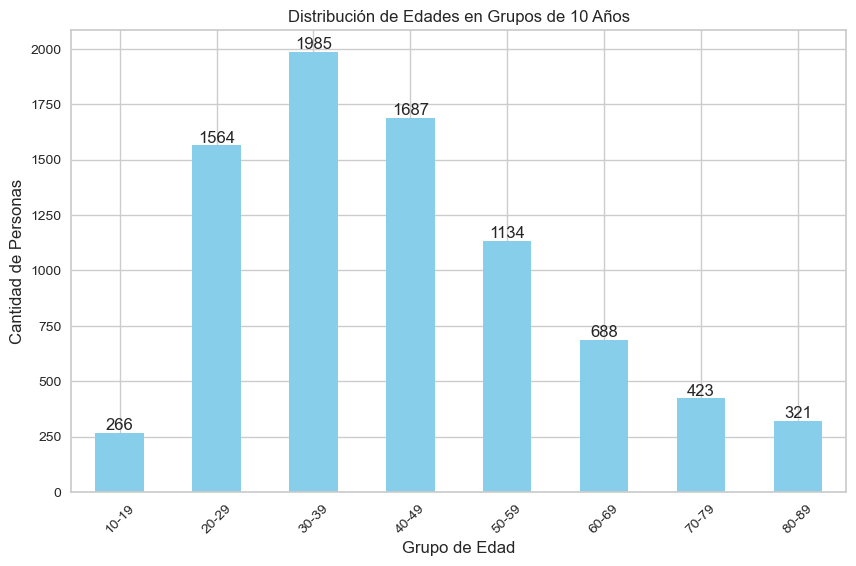

In [28]:
# Crear los grupos de edad
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90 ]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89' ]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Contar la cantidad de observaciones en cada grupo de edad
edad_counts = df['AgeGroup'].value_counts().sort_index()

# Generar un gráfico de barras
plt.figure(figsize=(10, 6))
edad_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Edades en Grupos de 10 Años')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=45)
# Agregar etiquetas encima de cada barra
for idx, value in enumerate(edad_counts):
    plt.text(idx, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

In [29]:
df.AgeGroup.value_counts().sum()

8068

In [30]:
# Imprimir la cantidad por grupo
print(f"Cantidad por grupo de edad: {df.AgeGroup.value_counts().sum()}")
df.AgeGroup.value_counts(),'',df.AgeGroup.value_counts('percentage')


Cantidad por grupo de edad: 8068


(30-39    1985
 40-49    1687
 20-29    1564
 50-59    1134
 60-69     688
 70-79     423
 80-89     321
 10-19     266
 Name: AgeGroup, dtype: int64,
 '',
 30-39    0.246034
 40-49    0.209098
 20-29    0.193852
 50-59    0.140555
 60-69    0.085275
 70-79    0.052429
 80-89    0.039787
 10-19    0.032970
 Name: AgeGroup, dtype: float64)

In [31]:
tabla_freq=(pd.crosstab(index=df["AgeGroup"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,AgeGroup,Freq. Abs.,Freq. Rel.
0,30-39,1985,0.246034
1,40-49,1687,0.209098
2,20-29,1564,0.193852
3,50-59,1134,0.140555
4,60-69,688,0.085275
5,70-79,423,0.052429
6,80-89,321,0.039787
7,10-19,266,0.032970


<a id=2.4> </a> <br>

## <span style="background:gray; color:white">3.4 </span><span style="">Work Experience</span>

In [32]:
# Generamos una copia para poder hacer imputacion
df = train.copy()
null_indices = df['Work_Experience'].isnull()

In [33]:
 df['Work_Experience'].isnull().value_counts(),'', df['Work_Experience'].isnull().value_counts('percentage')

(False    7239
 True      829
 Name: Work_Experience, dtype: int64,
 '',
 False    0.897248
 True     0.102752
 Name: Work_Experience, dtype: float64)

In [34]:
tabla_freq=(pd.crosstab(index=df["Work_Experience"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,Work_Experience,Freq. Abs.,Freq. Rel.
0,1.0,2354,0.325183
1,0.0,2318,0.320210
2,9.0,474,0.065479
3,8.0,463,0.063959
4,2.0,286,0.039508
5,3.0,255,0.035226
6,4.0,253,0.034950
7,6.0,204,0.028181
8,7.0,196,0.027076
9,5.0,194,0.026799


In [35]:
tabla_freq=(pd.crosstab(index=df["Work_Experience"].isnull(),columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,Work_Experience,Freq. Abs.,Freq. Rel.
0,False,7239,0.897248
1,True,829,0.102752


In [36]:
print(f'\n',df['Work_Experience'].value_counts().sum(), df['Age'].value_counts().sum(),'=',df['Work_Experience'].value_counts().sum()-df['Age'].value_counts().sum())


 7239 8068 = -829


In [37]:
#Vamos a hacer una regresion lineal basado en las columnas, edad, profesion (codificada) y genero (codificada)
# Basado en la edad y la profesion podríamos calcular aprx los años de experiencia (adicionalmente el genero) , 
 # por tanto usamo regresion lineal con predictores 'Gender', 'Profession', 'Age'
columns_of_interest = ['Gender', 'Profession', 'Age', 'Work_Experience']
df_copy = df[columns_of_interest].copy()
# Aplicar Label Encoding a las columnas 'Gender' y 'Profession'

df_copy['Gender'] = encoder.fit_transform(df_copy['Gender'])
df_copy['Profession'] = encoder.fit_transform(df_copy['Profession'])

In [38]:
# Separar las columnas en características (X) y variable objetivo (y)
X = df_copy.drop('Work_Experience', axis=1)
y = df_copy['Work_Experience']

# Separar los datos en conocidos y desconocidos
X_known = X[~y.isnull()]
X_unknown = X[y.isnull()]
y_known = y[~y.isnull()]

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_known, y_known)

# Predecir los valores faltantes
predicted_values = model.predict(X_unknown)

# Llenar los valores faltantes en la copia del DataFrame
df_copy.loc[y.isnull(), 'Work_Experience'] = predicted_values.round()

In [39]:
tabla_freq=(pd.crosstab(index=df_copy["Work_Experience"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq   

col_0,Work_Experience,Freq. Abs.,Freq. Rel.
0,1.0,2442,0.302677
1,0.0,2318,0.287308
2,3.0,736,0.091225
3,2.0,491,0.060858
4,9.0,474,0.058751
5,8.0,463,0.057387
6,4.0,308,0.038176
7,6.0,204,0.025285
8,7.0,196,0.024294
9,5.0,194,0.024046


In [40]:
### PARA SABER EN CATEGORIAS ASIGNO EL REGISTRO REVISAMOS UNA DIFERENCIA
# Seleccionar las columnas relevantes
columns_of_interest = ['Work_Experience']
df_subset = df[columns_of_interest]
df_copy_subset = df_copy[columns_of_interest]

# Calcular los conteos de valores
value_counts_original = df_subset['Work_Experience'].value_counts().sort_index()
value_counts_copy = df_copy_subset['Work_Experience'].value_counts().sort_index()

# Crear un DataFrame con los conteos
df_comparison_counts = pd.DataFrame({
    'Original': value_counts_original,
    'Imputados': value_counts_copy
})
# Calcular las diferencias
df_comparison_counts['Diferencia'] = df_comparison_counts['Imputados'] - df_comparison_counts['Original']

# Mostrar el DataFrame con el conteo y las diferencias
print(df_comparison_counts,f'\nDiferencia: ',df_comparison_counts.Diferencia.sum())


      Original  Imputados  Diferencia
0.0       2318       2318           0
1.0       2354       2442          88
2.0        286        491         205
3.0        255        736         481
4.0        253        308          55
5.0        194        194           0
6.0        204        204           0
7.0        196        196           0
8.0        463        463           0
9.0        474        474           0
10.0        53         53           0
11.0        50         50           0
12.0        48         48           0
13.0        46         46           0
14.0        45         45           0 
Diferencia:  829


In [41]:
# Llenar los valores faltantes en el DataFrame original ('train') con los valores imputados de la copia ('df_copy')
train.loc[null_indices, 'Work_Experience'] = df_copy.loc[null_indices, 'Work_Experience']

In [42]:
print(f"Cantidad por grupo de edad: {train.Work_Experience.value_counts().sum()}")

Cantidad por grupo de edad: 8068


In [43]:
tabla_freq=(pd.crosstab(index=train["Work_Experience"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq   

col_0,Work_Experience,Freq. Abs.,Freq. Rel.
0,1.0,2442,0.302677
1,0.0,2318,0.287308
2,3.0,736,0.091225
3,2.0,491,0.060858
4,9.0,474,0.058751
5,8.0,463,0.057387
6,4.0,308,0.038176
7,6.0,204,0.025285
8,7.0,196,0.024294
9,5.0,194,0.024046


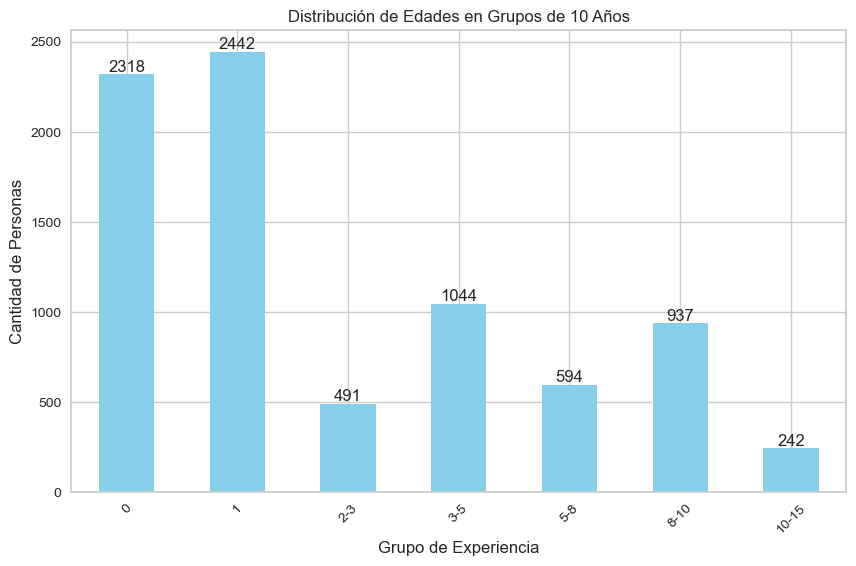

In [44]:
df = train.copy()

bins = [0, 1, 2, 3, 5,8, 10, 15]
labels = ['0', '1', '2-3', '3-5', '5-8', '8-10', '10-15']

df['Work_Experience'] = pd.cut(df['Work_Experience'], bins=bins, labels=labels, right=False)

# Contar la cantidad de observaciones en cada grupo de edad
experience_count = df['Work_Experience'].value_counts().sort_index()

# Generar un gráfico de barras
plt.figure(figsize=(10, 6))
experience_count.plot(kind='bar', color='skyblue')
plt.title('Distribución de Edades en Grupos de 10 Años')
plt.xlabel('Grupo de Experiencia')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=45)
# Agregar etiquetas encima de cada barra
for idx, value in enumerate(experience_count):
    plt.text(idx, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

<a id=2.5> </a> <br>

## <span style="background:gray; color:white">3.5 </span><span style="">Dummificacion</span>

In [45]:
train.isnull().sum()[np.where(train.isnull().sum() != 0)[0]]

Graduated       78
Profession     124
Family_Size    335
Var_1           76
dtype: int64

In [46]:
train.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,0,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,1,38,Yes,Engineer,3.0,Average,3.0,Cat_4,A
2,466315,Female,1,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,1,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,1,40,Yes,Entertainment,3.0,High,6.0,Cat_6,A


In [47]:
df = train.copy()

In [48]:
## Columna Spending_Score

In [49]:
tabla_freq=(pd.crosstab(index=df["Spending_Score"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq   

col_0,Spending_Score,Freq. Abs.,Freq. Rel.
0,Low,4878,0.604611
1,Average,1974,0.244670
2,High,1216,0.150719


In [50]:
## Columna Profession

In [51]:
train.isnull().sum()[np.where(train.isnull().sum() != 0)[0]]

Graduated       78
Profession     124
Family_Size    335
Var_1           76
dtype: int64

In [52]:
tabla_freq=(pd.crosstab(index=df["Profession"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq   

col_0,Profession,Freq. Abs.,Freq. Rel.
0,Artist,2516,0.316717
1,Healthcare,1332,0.167674
2,Entertainment,949,0.119461
3,Engineer,699,0.087991
4,Doctor,688,0.086606
5,Lawyer,623,0.078424
6,Executive,599,0.075403
7,Marketing,292,0.036757
8,Homemaker,246,0.030967


In [53]:
train['Profession'].mode()[0]

'Artist'

In [54]:
print(f'Modas')
print('Profesion: ',train['Profession'].mode()[0])
print('Graduado:',train['Graduated'].mode()[0])
print('var_1:',train['Var_1'].mode()[0])

Modas
Profesion:  Artist
Graduado: Yes
var_1: Cat_6


In [55]:
train.isnull().sum()[np.where(train.isnull().sum() != 0)[0]]

Graduated       78
Profession     124
Family_Size    335
Var_1           76
dtype: int64

In [56]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(train)
categorical_features

['Gender',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']

In [57]:
def na_x_moda(df):
        
    for col in categorical_features:
        df[col].fillna(train[col].mode()[0], inplace=True)
    return df

train = na_x_moda(train)    

In [58]:
train['Graduated'].value_counts()

Yes    5046
No     3022
Name: Graduated, dtype: int64

In [59]:
#Columna Graduated
train['Graduated'] = encoder.fit_transform(train['Graduated'])

In [60]:
train.isnull().sum(axis=0)

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

In [61]:
#Columna Spending_Score
train['Spending_Score'] = encoder.fit_transform(train['Spending_Score'])

In [62]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,0,22,0,Healthcare,1.0,2,4.0,Cat_4,D
1,462643,Female,1,38,1,Engineer,3.0,0,3.0,Cat_4,A
2,466315,Female,1,67,1,Engineer,1.0,2,1.0,Cat_6,B
3,461735,Male,1,67,1,Lawyer,0.0,1,2.0,Cat_6,B
4,462669,Female,1,40,1,Entertainment,3.0,1,6.0,Cat_6,A


<a id=2.6> </a> <br>

## <span style="background:gray; color:white">3.6 </span><span style="">Family Size</span>

In [63]:
tabla_freq=(pd.crosstab(index=train["Family_Size"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq 

col_0,Family_Size,Freq. Abs.,Freq. Rel.
0,2.0,2390,0.309065
1,3.0,1497,0.193586
2,1.0,1453,0.187896
3,4.0,1379,0.178327
4,5.0,612,0.079141
5,6.0,212,0.027415
6,7.0,96,0.012414
7,8.0,50,0.006466
8,9.0,44,0.005690


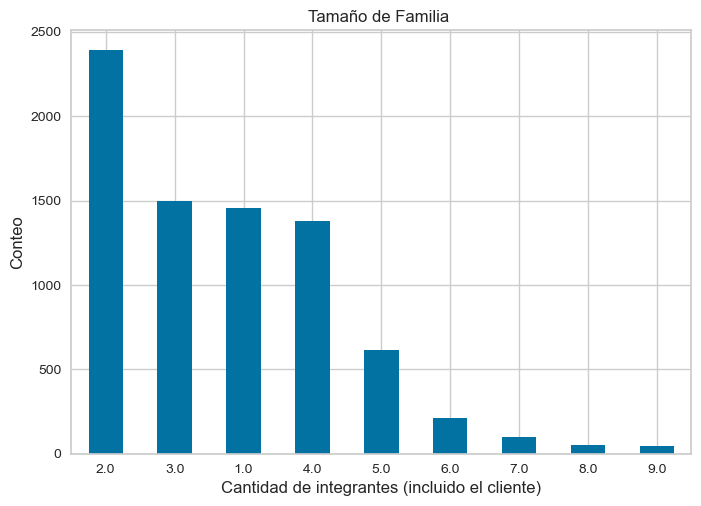

In [64]:
train.Family_Size.value_counts().plot(kind="bar")
plt.title("Tamaño de Familia ")
plt.xlabel("Cantidad de integrantes (incluido el cliente)")
plt.xticks(rotation=0)
plt.ylabel("Conteo")
plt.show()

In [65]:
train['Family_Size'].isnull().value_counts()
null_indices = df['Family_Size'].isnull()

In [66]:
columns_of_interest = ['Gender', 'Ever_Married', 'Age', 'Spending_Score','Family_Size']
df_copy = train[columns_of_interest].copy()
# Aplicar Label Encoding a las columnas 'Gender' y 'Profession'

df_copy['Gender'] = encoder.fit_transform(df_copy['Gender'])
df_copy['Spending_Score'] = encoder.fit_transform(df_copy['Spending_Score'])
# Separar las columnas en características (X) y variable objetivo (y)
X = df_copy.drop('Family_Size', axis=1)
y = df_copy['Family_Size']

# Separar los datos en conocidos y desconocidos
X_known = X[~y.isnull()]
X_unknown = X[y.isnull()]
y_known = y[~y.isnull()]

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_known, y_known)

# Predecir los valores faltantes
predicted_values = model.predict(X_unknown)

# Llenar los valores faltantes en la copia del DataFrame
df_copy.loc[y.isnull(), 'Family_Size'] = predicted_values.round()

In [67]:
### PARA SABER EN CATEGORIAS ASIGNO EL REGISTRO REVISAMOS UNA DIFERENCIA
# Seleccionar las columnas relevantes
columns_of_interest = ['Family_Size']
df_subset = train[columns_of_interest]
df_copy_subset = df_copy[columns_of_interest]

# Calcular los conteos de valores
value_counts_original = df_subset['Family_Size'].value_counts().sort_index()
value_counts_copy = df_copy_subset['Family_Size'].value_counts().sort_index()

# Crear un DataFrame con los conteos
df_comparison_counts = pd.DataFrame({
    'Original': value_counts_original,
    'Imputados': value_counts_copy
})
# Calcular las diferencias
df_comparison_counts['Diferencia'] = df_comparison_counts['Imputados'] - df_comparison_counts['Original']

# Mostrar el DataFrame con el conteo y las diferencias
print(df_comparison_counts,f'\nDiferencia: ',df_comparison_counts.Diferencia.sum())


     Original  Imputados  Diferencia
1.0      1453       1469          16
2.0      2390       2476          86
3.0      1497       1718         221
4.0      1379       1391          12
5.0       612        612           0
6.0       212        212           0
7.0        96         96           0
8.0        50         50           0
9.0        44         44           0 
Diferencia:  335


In [68]:
# Llenar los valores faltantes en el DataFrame original ('train') con los valores imputados de la copia ('df_copy')
train.loc[null_indices, 'Family_Size'] = df_copy.loc[null_indices, 'Family_Size']

In [69]:
train.isnull().sum()[np.where(train.isnull().sum() != 0)[0]]

Series([], dtype: int64)

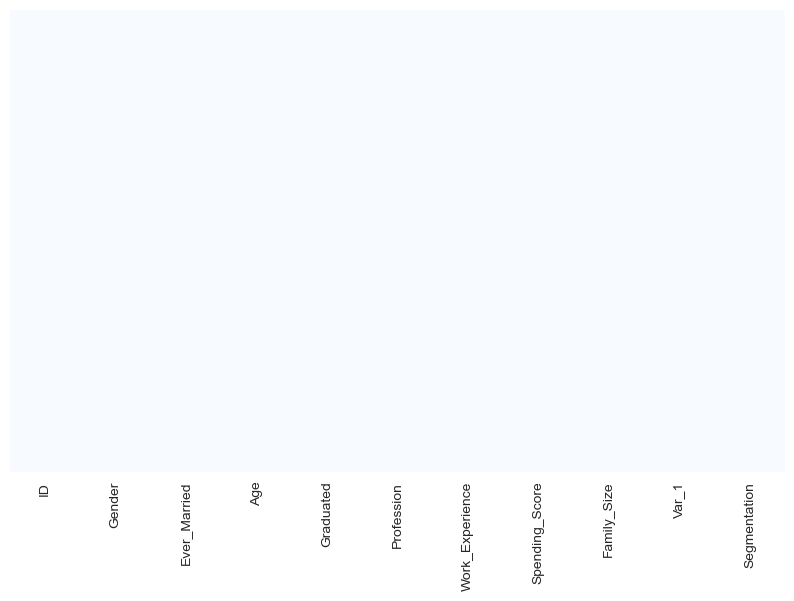

In [70]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [71]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,0,22,0,Healthcare,1.0,2,4.0,Cat_4,D
1,462643,Female,1,38,1,Engineer,3.0,0,3.0,Cat_4,A
2,466315,Female,1,67,1,Engineer,1.0,2,1.0,Cat_6,B
3,461735,Male,1,67,1,Lawyer,0.0,1,2.0,Cat_6,B
4,462669,Female,1,40,1,Entertainment,3.0,1,6.0,Cat_6,A


In [72]:
# Codificamos la columnas faltantes
#train['Gender'] = encoder.fit_transform(train['Gender'])
#train['Spending_Score'] = encoder.fit_transform(train['Spending_Score'])

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   int32  
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   int32  
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   int32  
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int32(3), int64(2), object(4)
memory usage: 598.9+ KB



<a id=3> </a> <br>

## <span style="background:gray; color:white">4 </span><span style="">Visualizacion</span>

In [74]:
# Numericas

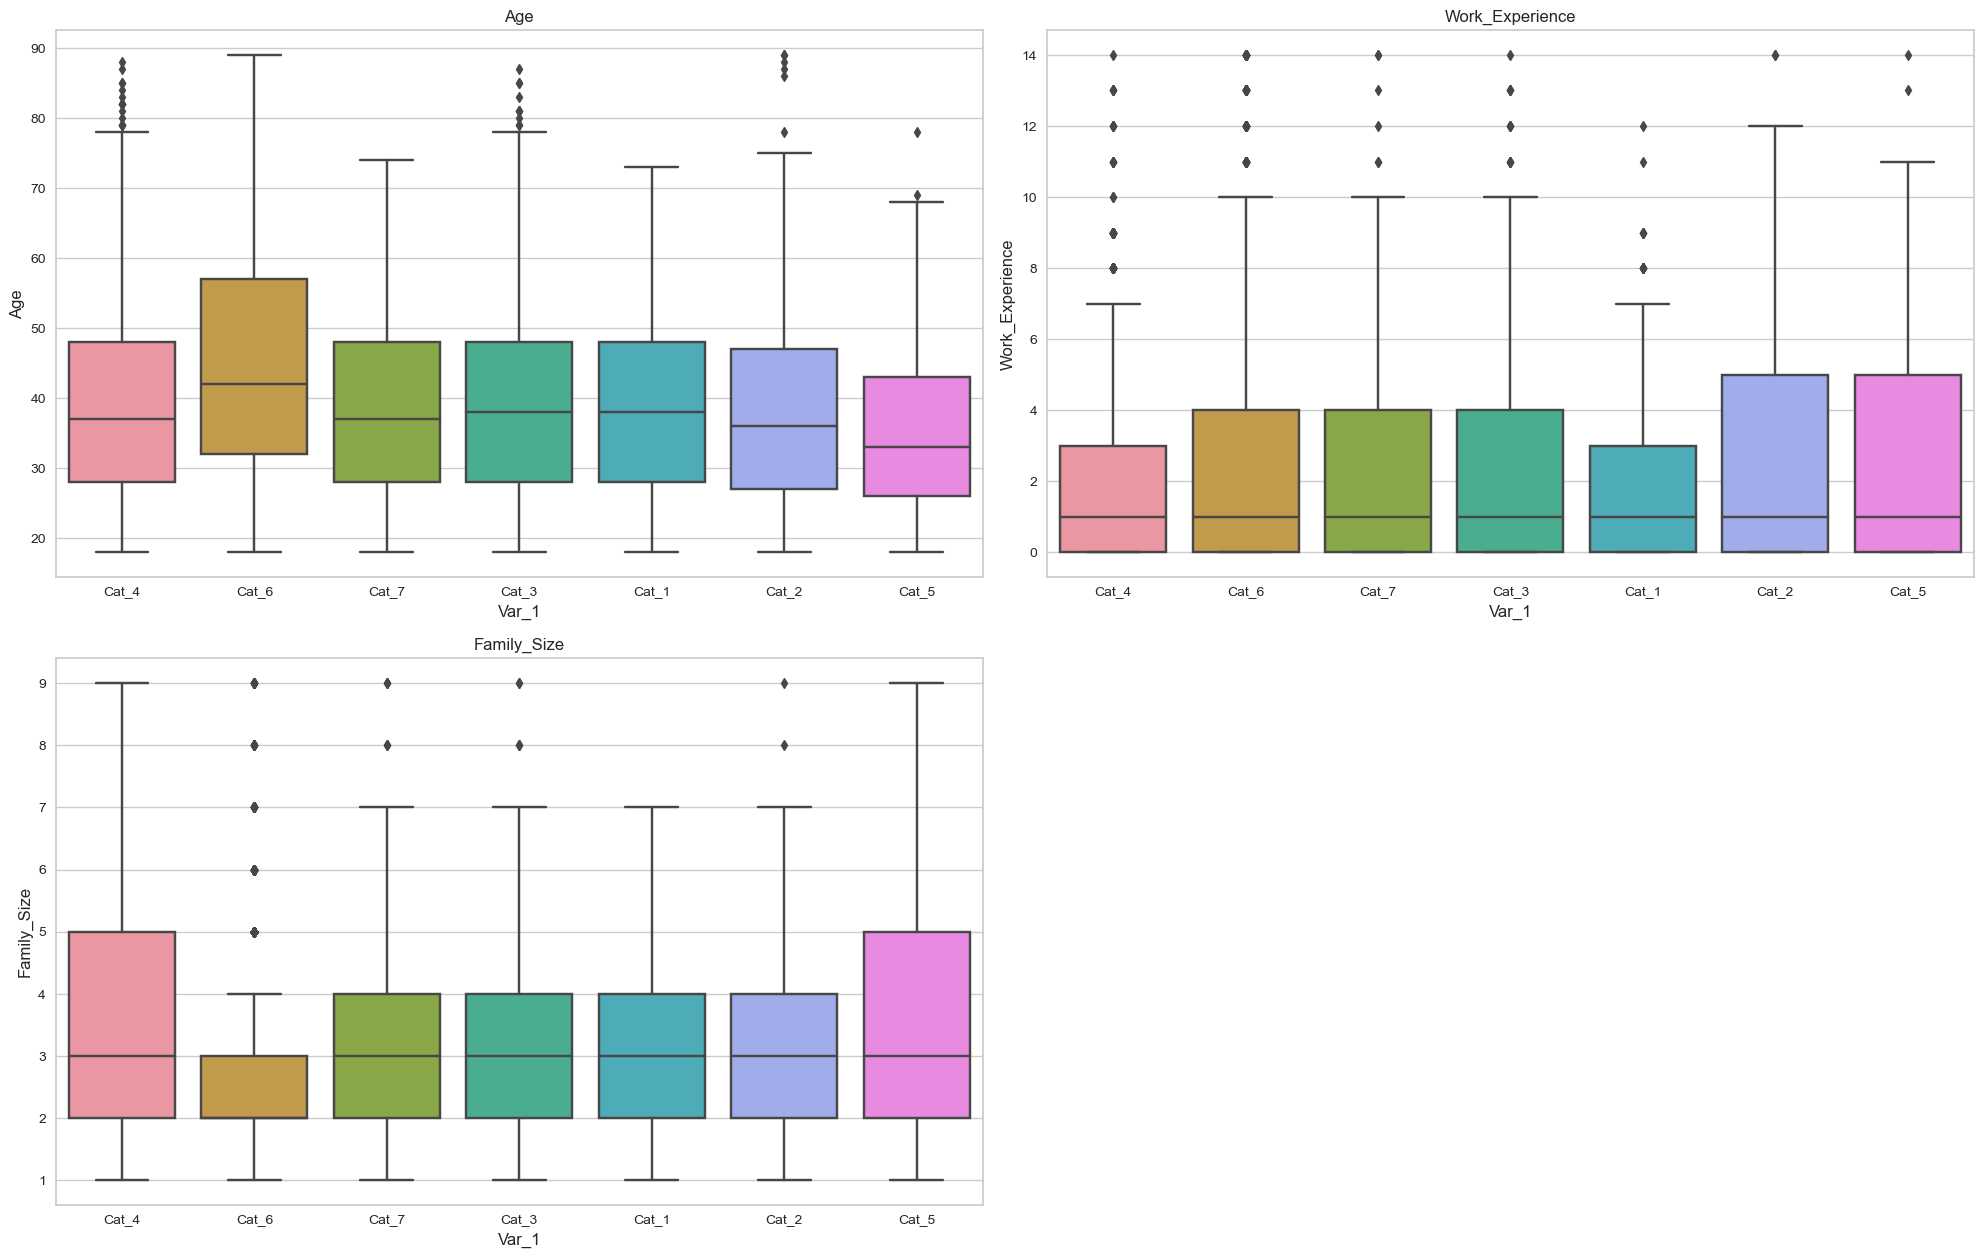

In [75]:
# Mediante el diagrama de cajas y bigotes vemos un resumen visual de la distribución de cada
# una de las variables independientes con respecto a la dependiente
# Podemos observar la distribución de los distintos grupos
# int32 - Imputados (no visualizar)

fig = plt.figure(figsize=(20,50))
i=1

for var_num in train.select_dtypes(include=['int64','float64']).columns[1:5]:
    ax = fig.add_subplot(8, 2, i)
    sns.boxplot(x=train.columns[9], y=var_num, data=train)
    plt.title(var_num)
    i+=1
fig.tight_layout()


<a id=4> </a> <br>

## <span style="background:gray; color:white">5 </span><span style="">Outliers</span>

In [76]:
# Buscamos datos atípicos a partir de los diagramas previos y lo suministrado en el diccionario de datos
# Establecemos unos límites superiores e inferiores para ver si hay datos que se salen de lo normal
# Para estos límites establecemos aquellos valores para cada variable a una distancia de más o menos 4 desviaciones estándar

upper_bounds={}
lower_bounds={}
for col in train.select_dtypes(include=['int64','float64']).columns[1:5]:
    values=train[col]
    upper_bounds[col]=values.mean()+4*values.std()
    lower_bounds[col]=values.mean()-4*values.std()

In [77]:
# Vamos a localizar aquellos valores que se pasen de estos límites
encima=0
debajo =0
for col in train.select_dtypes(include=['int64','float64']).columns[1:5]:
    values=train[col]
    if(train[values>upper_bounds[col]][col].count() > 0):
        print("Por encima")
        print(train[values>upper_bounds[col]][col])
        encima+=1
    if(train[values<lower_bounds[col]][col].count() > 0):
        print("Por debajo")
        print(train[values<lower_bounds[col]][col])
        debajo+=1
print(f'encima: {encima}, debajo {debajo}')        

Por encima
150     9.0
940     9.0
1447    9.0
1509    9.0
1546    9.0
1902    9.0
1942    9.0
2401    9.0
2511    9.0
2568    9.0
2609    9.0
2647    9.0
2710    9.0
2716    9.0
3035    9.0
3235    9.0
3361    9.0
3705    9.0
4249    9.0
4633    9.0
4698    9.0
4948    9.0
4956    9.0
5078    9.0
5418    9.0
5581    9.0
6061    9.0
6303    9.0
6370    9.0
6392    9.0
6879    9.0
6894    9.0
6909    9.0
7047    9.0
7270    9.0
7347    9.0
7497    9.0
7542    9.0
7579    9.0
7745    9.0
7776    9.0
7897    9.0
7900    9.0
7995    9.0
Name: Family_Size, dtype: float64
encima: 1, debajo 0


In [78]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,0,22,0,Healthcare,1.0,2,4.0,Cat_4,D
1,462643,Female,1,38,1,Engineer,3.0,0,3.0,Cat_4,A
2,466315,Female,1,67,1,Engineer,1.0,2,1.0,Cat_6,B
3,461735,Male,1,67,1,Lawyer,0.0,1,2.0,Cat_6,B
4,462669,Female,1,40,1,Entertainment,3.0,1,6.0,Cat_6,A


In [79]:
# Revisamos la información de aquellos clientes con valores atípicos

data_outlier = train[train['Family_Size'] > upper_bounds['Family_Size']]
print(data_outlier.shape)
data_outlier.head()

(44, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
150,464972,Male,1,67,0,Lawyer,0.0,1,9.0,Cat_4,A
940,466441,Male,0,22,0,Healthcare,0.0,2,9.0,Cat_6,D
1447,466534,Male,0,28,0,Healthcare,0.0,2,9.0,Cat_6,D
1509,464634,Female,0,32,1,Engineer,3.0,2,9.0,Cat_4,D
1546,467749,Male,0,19,0,Healthcare,1.0,2,9.0,Cat_7,D


In [80]:
for var in data_outlier.columns[1:]:
  print(pd.crosstab(index=data_outlier[var],columns="count").reset_index())

col_0  Gender  count
0      Female     21
1        Male     23
col_0  Ever_Married  count
0                 0     22
1                 1     22
col_0  Age  count
0       18      1
1       19      1
2       22      3
3       23      2
4       25      2
5       26      2
6       27      2
7       28      3
8       29      1
9       30      3
10      31      2
11      32      2
12      33      3
13      37      1
14      40      1
15      41      1
16      43      1
17      45      2
18      50      2
19      51      1
20      55      1
21      56      2
22      60      1
23      62      1
24      65      1
25      67      1
26      69      1
col_0  Graduated  count
0              0     27
1              1     17
col_0     Profession  count
0             Artist      6
1             Doctor      5
2           Engineer      5
3      Entertainment      2
4          Executive      8
5         Healthcare      9
6          Homemaker      1
7             Lawyer      4
8          Marketing      4


Se puede detallar que solo se presentaron datos atípicos en la variable del número de integrantes de la familia del cliente, en este caso es raro que sea de 9 integrantes (incluyéndolo). Detallando un poco algunos de los clientes con este número de integrantes en su familia, se pudo observar que la mayoría eran hombres jóvenes que no se han graduado y no tienen años de experiencia laboral o tienen al menos 1. Por ende, se decidió retirarlos de la base de datos de entrenamiento.

In [81]:
train = train.drop(data_outlier.index).reset_index(drop=True)
print(train.shape)
pd.crosstab(index=train['Family_Size'],columns="count").reset_index()

(8024, 11)


col_0,Family_Size,count
0,1.0,1469
1,2.0,2476
2,3.0,1718
3,4.0,1391
4,5.0,612
5,6.0,212
6,7.0,96
7,8.0,50


C:\Users\CARLOS\AppData\Local\Temp\ipykernel_21072\1472403073.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_spearman = train.corr(method='spearman')


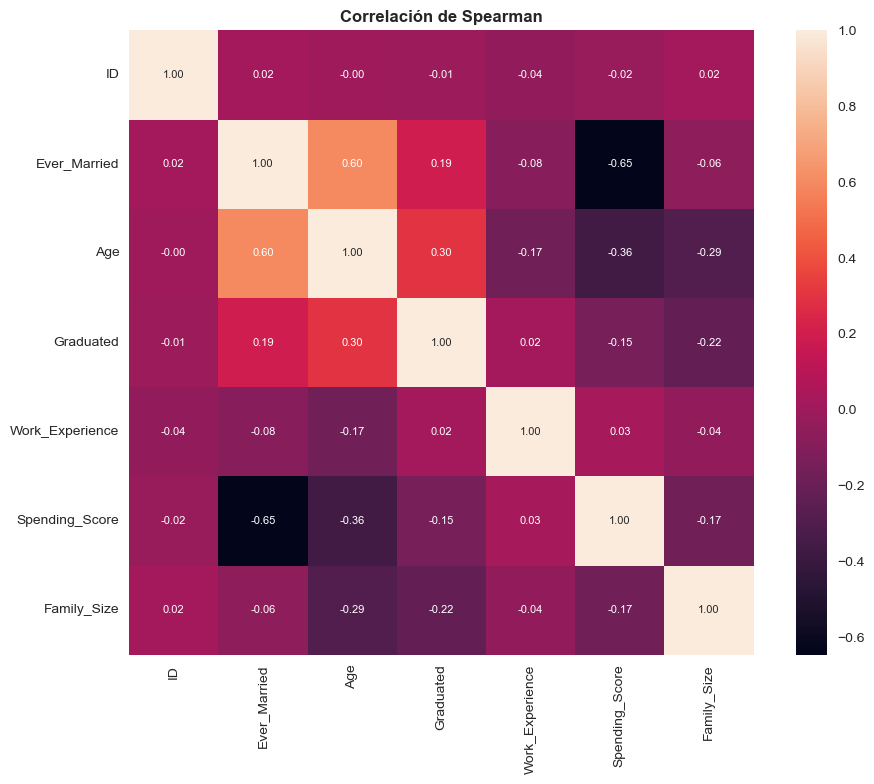

In [82]:
# Grafico de correlaciones de Spearman

corr_spearman = train.corr(method='spearman')

fig , ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_spearman , annot = True , annot_kws = {'size':8},square=True, fmt='.2f')
plt.title('Correlación de Spearman', fontweight ='bold')
plt.tight_layout()
plt.show()

In [83]:
# Antes de realizar los cambios podemos darnos cuenta del baseline para los modelos que
# vamos a implementar
# Al estar trabajando con una tarea de clasificación, utilizamos la clase mayoritaria
# En este caso es el segmento del cliente tipo D
# 28.04% es nuestro baseline

print(pd.crosstab(index=train["Segmentation"], columns="count"))
baseline = train['Segmentation'][train['Segmentation'] == 'D'].count()/train.shape[0]*100
print(f"Baseline: {baseline}")

col_0         count
Segmentation       
A              1961
B              1854
C              1959
D              2250
Baseline: 28.04087736789631


<Axes: >

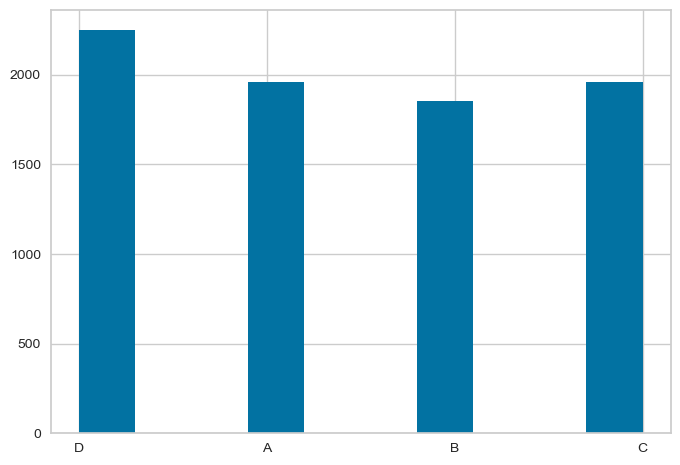

In [84]:
train['Segmentation'].hist()

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8024 non-null   int64  
 1   Gender           8024 non-null   object 
 2   Ever_Married     8024 non-null   int32  
 3   Age              8024 non-null   int64  
 4   Graduated        8024 non-null   int32  
 5   Profession       8024 non-null   object 
 6   Work_Experience  8024 non-null   float64
 7   Spending_Score   8024 non-null   int32  
 8   Family_Size      8024 non-null   float64
 9   Var_1            8024 non-null   object 
 10  Segmentation     8024 non-null   object 
dtypes: float64(2), int32(3), int64(2), object(4)
memory usage: 595.7+ KB


<a id=5.1> </a> <br>

## <span style="background:gray; color:white">6 </span><span style="">Extracción de información de los datos</span>
Despues de hacer limpieza de datos, podemos determinar las sgte caracteristicas de las variables predictoras y la variable objetivo (segmentacion)
1. Ever_Married : 58.4% de los clientes se han casado alguna vez
2. Age: encontramos 8 grupos etarios en donde los valores minimo y maximo son 18 y 89 años, el mas del 50% de los datos esta entre 20 y 50 años, el grupo etario con mayor cantidad de registro es 30-39 años
3. Work_Experience: mas del 50% de los clientes tienen como maximo 1 año de experiencia.
4. Spending_score (calificacion de tendencia de gasto): el 60% de los datos tiene una baja (low) tendencia de gasto
5. Profession: La moda de los cliente es Artist y mas del 50% de los datos esta distribuido entre Artist, Healthcare y Entertainment
6. Graduated : Mas de la mitad de los clientes cuentan con graduacion
7. Family_size : mas del 50% de los clientes tienen un tamaño de familia (incluido el cliente) de 1,2 o 3 integrantes (podrian ser solteros, parejas y parejas con 1 hijo).
8. Gender: Tenemos una distribucion aprox balanceada de genero (54%-45%)
9. Var_1 (Categoría anónima para el cliente): podemos ver que la moda es Cat_6 y que el resto de los datos (40% aprx) esta distibuido entre los demas categorias.
10. Segmentation (Variable Objetivo): podemos ver una distribucion balanceada entre las etiqutas asignadas, con una clase mayoritaria :D


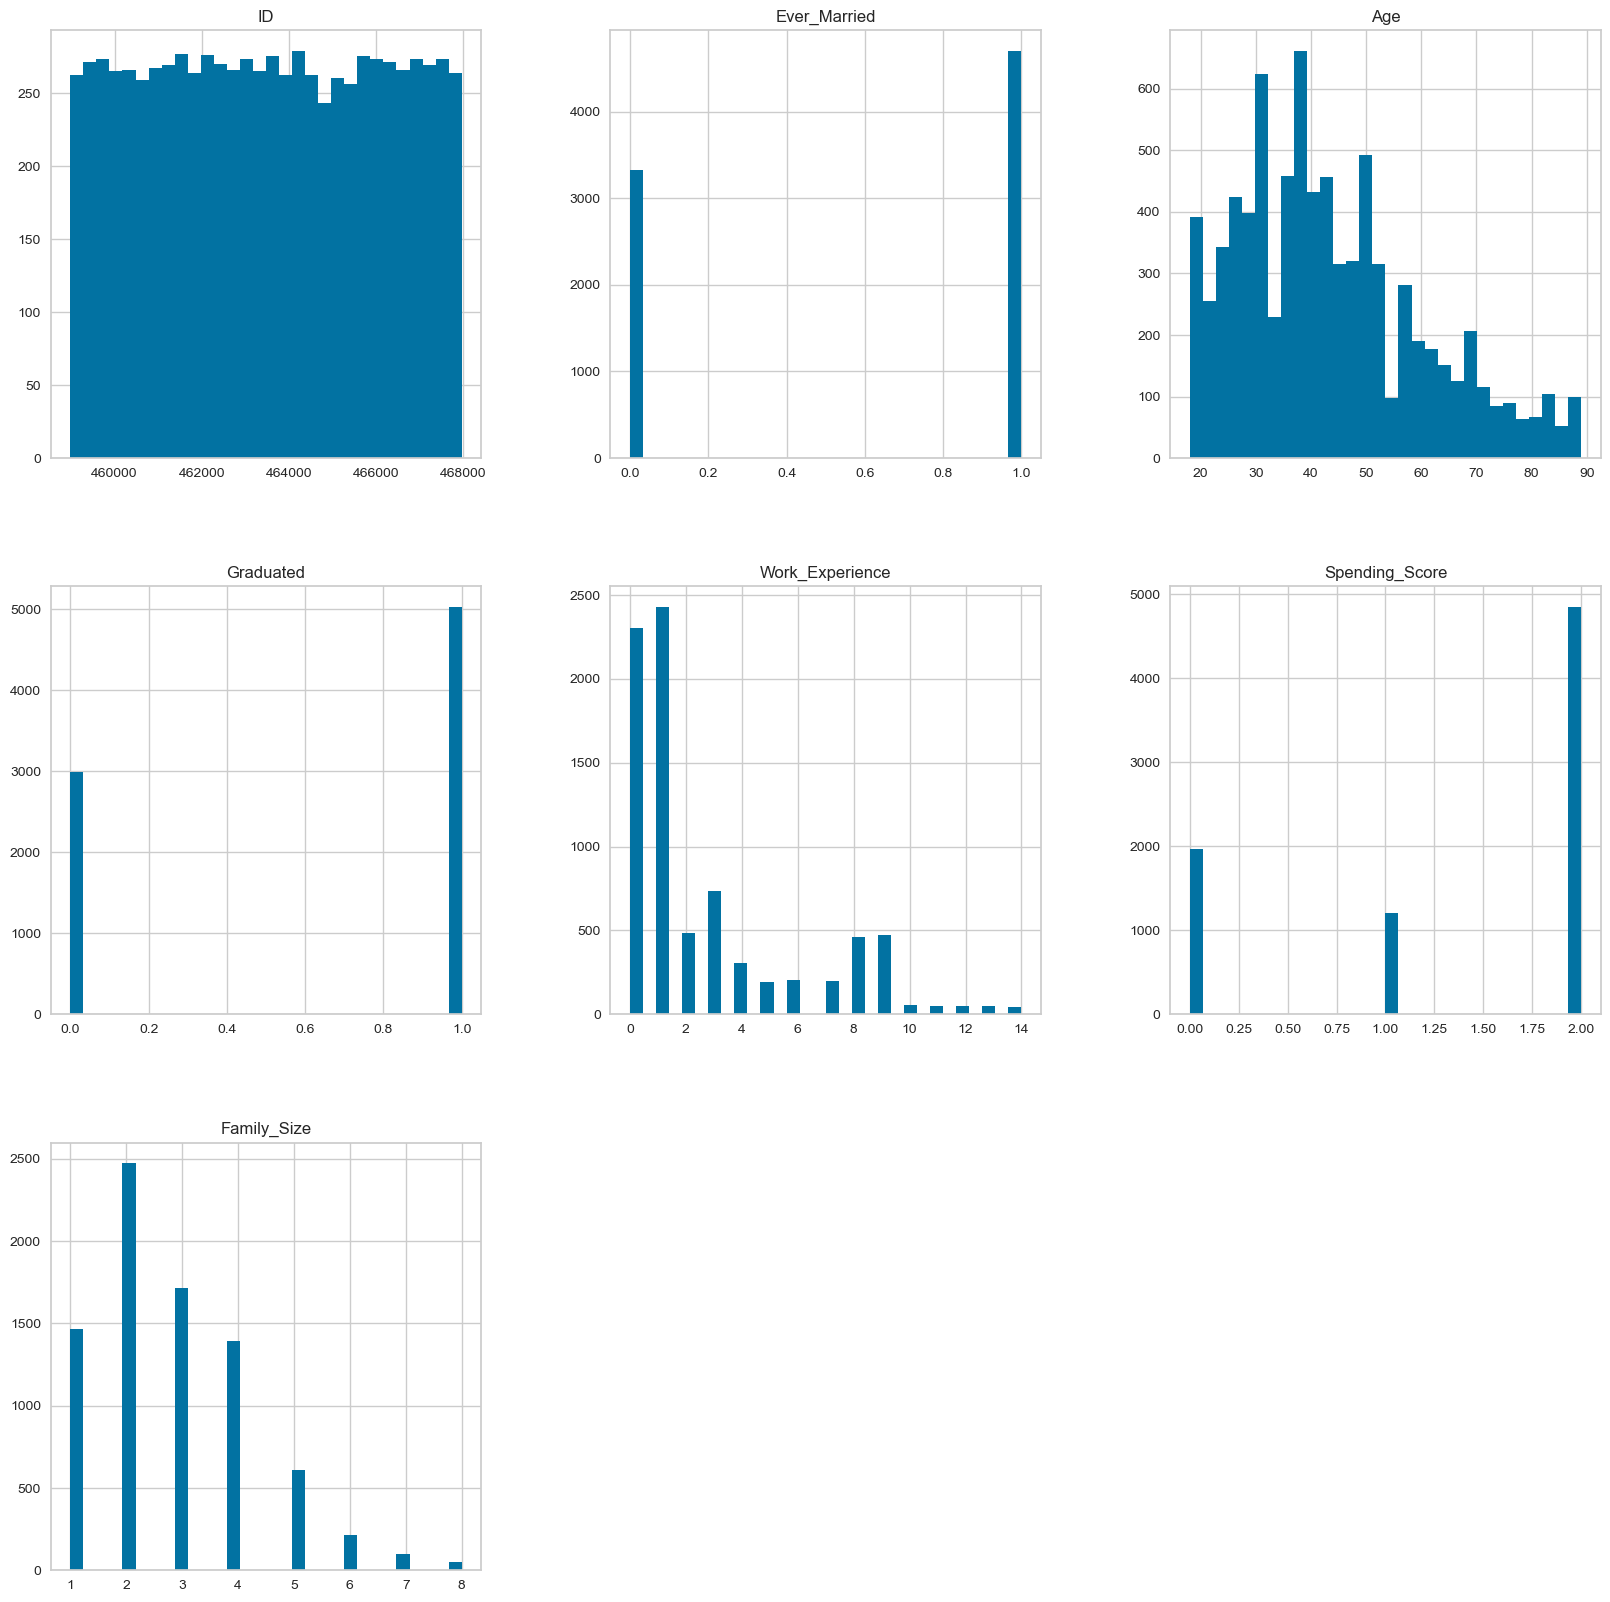

In [86]:
# Realizamos un histograma
# De esta manera observamos la distribución de cada una de las variables dentro del dataframe

train.hist(bins = 30, figsize = (20, 20), color = 'b');

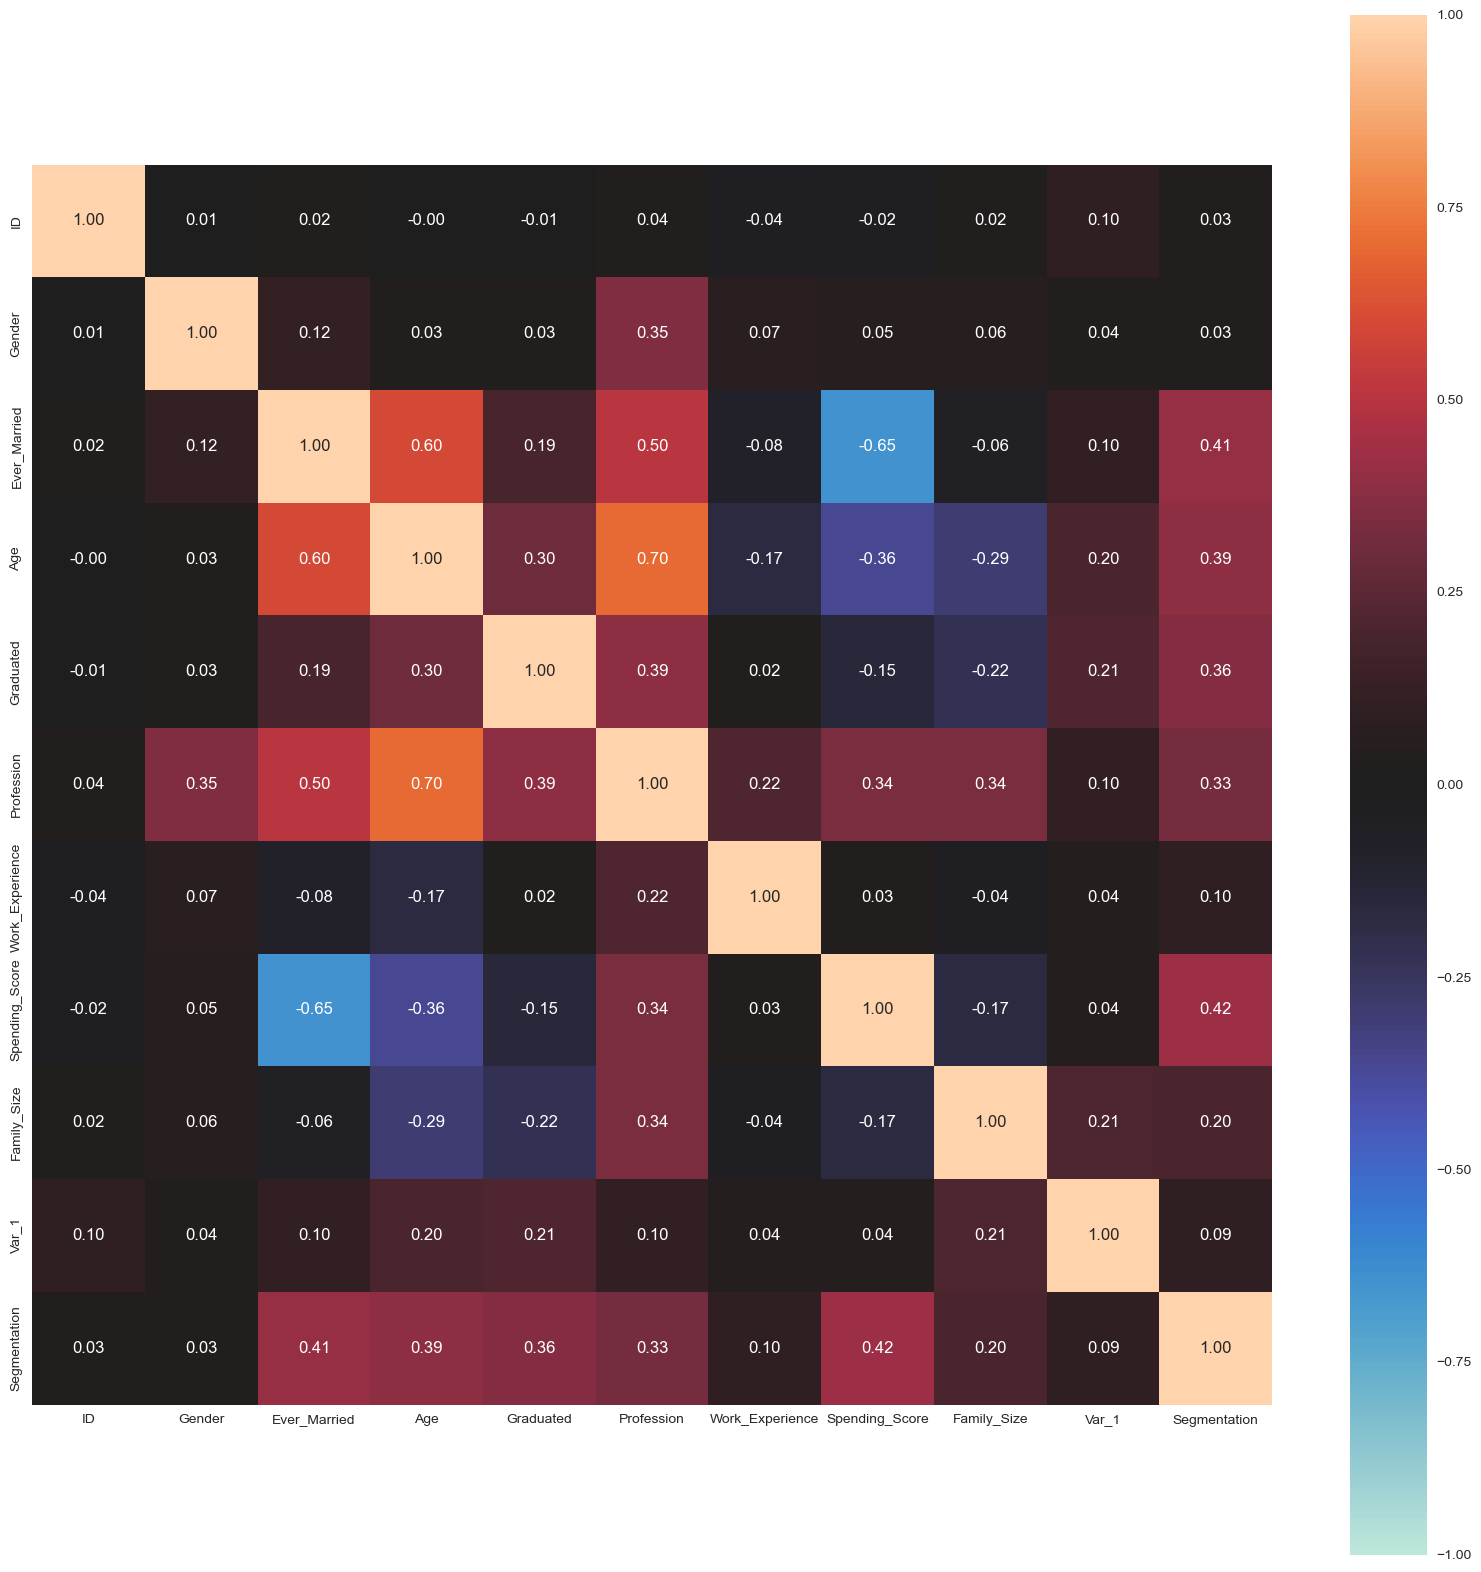

In [87]:
# Matriz de correlacion para todas las variable
from dython.nominal import associations
complete_correlation= associations(train, num_num_assoc='spearman', figsize=(20,20))

<a id=5.2> </a> <br>

## <span style="background:gray; color:white">6 </span><span style="">Extracción de información de los datos II</span>
1. Genero : El genero tiene una correlacion positiva baja con la profesion
2. Ever_Married: tiene una correacion positiva media con la edad y la profesion; una correlacion media negativa con spending_score. y con la segmentacion tiene una correlacion media-baja con segmentacion (variable objetivo)
3. Age: tiene una correlacion media alta con la profesion  y con la segmentacion tiene una correlacion media-baja con segmentacion (variable objetivo)
4. Graduated: tiene una correlacion media-baja con la edad
5. con la segmentacion tiene una correlacion media-baja con segmentacion (variable objetivo)

In [88]:
# Seleccionar las columnas de tipo objeto
cols_to_mode = train.select_dtypes(include=['object']).columns[0:2]

# Aplicar la train a las columnas seleccionadas
df_mode = train.copy()  # Crear una copia para no modificar el DataFrame original

for col in cols_to_mode:
    mode_val = train[col].mode()[0]  # Calcular la moda (podría haber múltiples modas)
    df_mode[col] = df_mode[col].fillna(mode_val)

print(df_mode.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8024 non-null   int64  
 1   Gender           8024 non-null   object 
 2   Ever_Married     8024 non-null   int32  
 3   Age              8024 non-null   int64  
 4   Graduated        8024 non-null   int32  
 5   Profession       8024 non-null   object 
 6   Work_Experience  8024 non-null   float64
 7   Spending_Score   8024 non-null   int32  
 8   Family_Size      8024 non-null   float64
 9   Var_1            8024 non-null   object 
 10  Segmentation     8024 non-null   object 
dtypes: float64(2), int32(3), int64(2), object(4)
memory usage: 595.7+ KB
None


In [89]:
df_mode.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,0,22,0,Healthcare,1.0,2,4.0,Cat_4,D
1,462643,Female,1,38,1,Engineer,3.0,0,3.0,Cat_4,A
2,466315,Female,1,67,1,Engineer,1.0,2,1.0,Cat_6,B
3,461735,Male,1,67,1,Lawyer,0.0,1,2.0,Cat_6,B
4,462669,Female,1,40,1,Entertainment,3.0,1,6.0,Cat_6,A


In [90]:
# Extracción y transformación de variables
# Utilizamos one-hot encoding

for var_num in df_mode.select_dtypes(include=['object']).columns[0:3]:
    df_mode = pd.get_dummies(df_mode, columns=[var_num])

In [91]:
df_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8024 non-null   int64  
 1   Ever_Married              8024 non-null   int32  
 2   Age                       8024 non-null   int64  
 3   Graduated                 8024 non-null   int32  
 4   Work_Experience           8024 non-null   float64
 5   Spending_Score            8024 non-null   int32  
 6   Family_Size               8024 non-null   float64
 7   Segmentation              8024 non-null   object 
 8   Gender_Female             8024 non-null   uint8  
 9   Gender_Male               8024 non-null   uint8  
 10  Profession_Artist         8024 non-null   uint8  
 11  Profession_Doctor         8024 non-null   uint8  
 12  Profession_Engineer       8024 non-null   uint8  
 13  Profession_Entertainment  8024 non-null   uint8  
 14  Professi

In [92]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,0,22,0,Healthcare,1.0,2,4.0,Cat_4,D
1,462643,Female,1,38,1,Engineer,3.0,0,3.0,Cat_4,A
2,466315,Female,1,67,1,Engineer,1.0,2,1.0,Cat_6,B
3,461735,Male,1,67,1,Lawyer,0.0,1,2.0,Cat_6,B
4,462669,Female,1,40,1,Entertainment,3.0,1,6.0,Cat_6,A


In [93]:

df_mode.isnull().sum()[np.where(df_mode.isnull().sum() != 0)[0]]

Series([], dtype: int64)

In [94]:
df_mode.columns

Index(['ID', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Segmentation', 'Gender_Female',
       'Gender_Male', 'Profession_Artist', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [95]:
df_mode['Segmentation'] = encoder.fit_transform(df_mode['Segmentation'])

In [96]:
# Construimos una función que nos permite obtener el X y el Y para el dataframe

def obtain_X_y(df):
    return df.drop(columns=['Segmentation']), df[['Segmentation']]


In [97]:

#train = df_Backup.copy()
#df_Backup.select_dtypes(include=['object']).columns[0:2]
df_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8024 non-null   int64  
 1   Ever_Married              8024 non-null   int32  
 2   Age                       8024 non-null   int64  
 3   Graduated                 8024 non-null   int32  
 4   Work_Experience           8024 non-null   float64
 5   Spending_Score            8024 non-null   int32  
 6   Family_Size               8024 non-null   float64
 7   Segmentation              8024 non-null   int32  
 8   Gender_Female             8024 non-null   uint8  
 9   Gender_Male               8024 non-null   uint8  
 10  Profession_Artist         8024 non-null   uint8  
 11  Profession_Doctor         8024 non-null   uint8  
 12  Profession_Engineer       8024 non-null   uint8  
 13  Profession_Entertainment  8024 non-null   uint8  
 14  Professi

In [98]:
df_mode['Segmentation'] = encoder.inverse_transform(df_mode['Segmentation'])

In [99]:
X,y = obtain_X_y(df_mode)

In [100]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Segmentation  8024 non-null   object
dtypes: object(1)
memory usage: 62.8+ KB


In [101]:
y.head()

,Segmentation
0,D
1,A
2,B
3,B
4,A


<a id=6> </a> <br>

## <span style="background:gray; color:white">7 </span><span style="">Protocolos de Evaluacion</span>

<a id=6.1> </a> <br>

## <span style="background:gray; color:white">7.1 </span><span style="">HoldOut (0.3 Test)</span>

In [102]:
### HoldOut
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12345,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5616, 25)
(2408, 25)
(5616, 1)
(2408, 1)


<a id=6.2> </a> <br>

## <span style="background:gray; color:white">7.2 </span><span style="">Metricas de Evaluacion</span>

In [103]:
# Implementamos una función que nos permita calcular las métricas de regresión para el conjunto
# de entrenamiento y de prueba
# Accuracy, Kappa, Precision, Recall
# Nos retorna el modelo entrenado y un diccionario con las principales métricas sobre el conjunto de
# entrenamiento y el de prueba
# Accuracy = (TP + TN) / (TP + FP + FN + TN)
# Kappa = (OA - AC) / (1 - AC)
# Precision = TP / (TP + FP) (valor positivo predicho, la proporción correcta de
# identificaciones positivas)
# Recall = TP / (TP + FN) (la proporción de positivos que fueron identificados correctamente)

def classification_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    kappa_train = cohen_kappa_score(y_train, y_pred_train)
    kappa_test = cohen_kappa_score(y_test, y_pred_test)
    prec_train = precision_score(y_train, y_pred_train,average=None)
    prec_test = precision_score(y_test, y_pred_test,average=None)
    recall_train = recall_score(y_train, y_pred_train,average=None)
    recall_test = recall_score(y_test, y_pred_test,average=None)
    metrics = {"Training Accuracy": acc_train,
               "Test Accuracy": acc_test,
               "Training Kappa": kappa_train,
               "Test Kappa": kappa_test,
               "Training Precision": prec_train,
               "Test Precision": prec_test,
               "Training recall": recall_train,
               "Test recall": recall_test
               }
    for item in metrics.items():
        print(item[0],"=",item[1])
    return model,metrics

def kappa_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    kappa_train = cohen_kappa_score(y_train, y_pred_train)
    kappa_test = cohen_kappa_score(y_test, y_pred_test)
    return kappa_train, kappa_test

<a id=6.0> </a> <br>

## <span style="background:gray; color:white">7.0 </span><span style="">BaseLine</span>

In [104]:
# Establecemos el baseline a partir de un dummy regressor

from sklearn.dummy import DummyRegressor

classification_metrics(DummyClassifier(strategy='most_frequent'),X_train,X_test,y_train,y_test)

Training Accuracy = 0.28044871794871795
Test Accuracy = 0.2803156146179402
Training Kappa = 0.0
Test Kappa = 0.0
Training Precision = [0.         0.         0.         0.28044872]
Test Precision = [0.         0.         0.         0.28031561]
Training recall = [0. 0. 0. 1.]
Test recall = [0. 0. 0. 1.]


C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(DummyClassifier(strategy='most_frequent'),
 {'Training Accuracy': 0.28044871794871795,
  'Test Accuracy': 0.2803156146179402,
  'Training Kappa': 0.0,
  'Test Kappa': 0.0,
  'Training Precision': array([0.        , 0.        , 0.        , 0.28044872]),
  'Test Precision': array([0.        , 0.        , 0.        , 0.28031561]),
  'Training recall': array([0., 0., 0., 1.]),
  'Test recall': array([0., 0., 0., 1.])})

In [105]:
# Vamos a definir una función para dibujar la matriz de confusión y el reporte de
# clasificación en donde podemos obtener las métricas de entrenamiento y prueba

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicción')

def report_and_conf_matrix(model,X_train,X_test,y_train,y_test):
    md = model.fit(X_train,y_train)
    y_pred_train = md.predict(X_train)
    y_pred_test = md.predict(X_test)
    cnf_matrix1 = confusion_matrix(y_train, y_pred_train)
    cnf_matrix2 = confusion_matrix(y_test, y_pred_test)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix1, classes=["A","B","C","D"],
                      title='Matriz de confusión Entrenamiento')
    print("Reporte Entrenamiento")
    print(classification_report(y_train, y_pred_train, target_names=["A","B","C","D"]))
    plt.show()
    plt.figure()
    plot_confusion_matrix(cnf_matrix2, classes=["A","B","C","D"],
                      title='Matriz de confusión Prueba')
    print("Reporte Prueba")
    print(classification_report(y_test, y_pred_test, target_names=["A","B","C","D"]))
    plt.show()

In [106]:
# Vamos a utilizar el área bajo la curva ROC para evaluar nuestro modelo también
# Con esta gráfica vamos a poder visualizar el desempeño del modelo entre la
# sensibilidad (recall - true positive rate) y la especificidad (true negative rate)
# Establecer un balance entre ambos
# Recall es la habilidad para identificar correctamente las observaciones que son positivas
# Especificidad es la habilidad para indentificar correctamente las observaciones que son
# negativas
# AUC ROC nos permite identificar que tan bien nuestro modelo puede distinguir entre las clases
# Al tener nosotros un problema multi - clase utilizaremos una metodología uno vs el resto
# Se tendrán tantas curvas como clases
# Yellowbrick es muy útil y simple para esto

def plot_ROC_curve(model, X_train, y_train, X_test, y_test):
    visualizer = ROCAUC(model, encoder={'A': 'Clase A',
                                        'B': 'Clase B',
                                        'C': 'Clase C',
                                        'D': 'Clase D'})
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    return visualizer

<a id=7> </a> <br>

## <span style="background:gray; color:white">8 </span><span style="">Modelos</span>

<a id=7.1> </a> <br>

## <span style="background:gray; color:white">8.1 </span><span style="">Modelo de clasificacion con KNN (K Vecinos mas Cercanos)</span>

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Reporte Entrenamiento
              precision    recall  f1-score   support

           A       0.52      0.64      0.57      1394
           B       0.51      0.51      0.51      1272
           C       0.64      0.62      0.63      1375
           D       0.75      0.62      0.68      1575

    accuracy                           0.60      5616
   macro avg       0.61      0.60      0.60      5616
weighted avg       0.61      0.60      0.60      5616



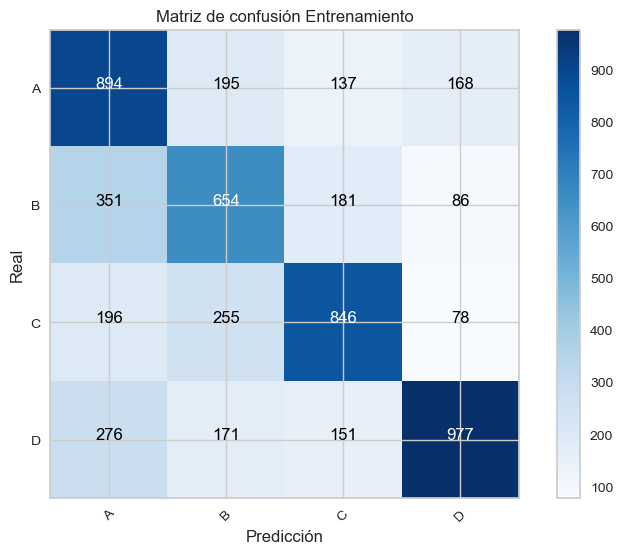

Reporte Prueba
              precision    recall  f1-score   support

           A       0.31      0.40      0.35       567
           B       0.35      0.32      0.34       582
           C       0.46      0.45      0.45       584
           D       0.60      0.51      0.55       675

    accuracy                           0.42      2408
   macro avg       0.43      0.42      0.42      2408
weighted avg       0.44      0.42      0.43      2408



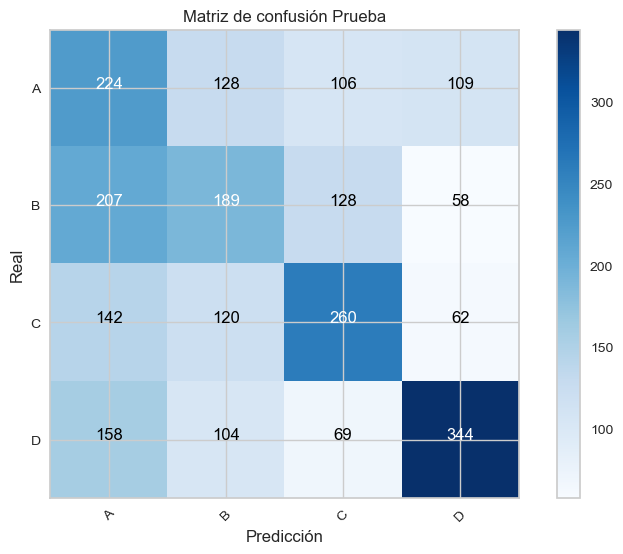

In [107]:
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Prueba con K=5 inicialmente
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

report_and_conf_matrix(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test)


C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


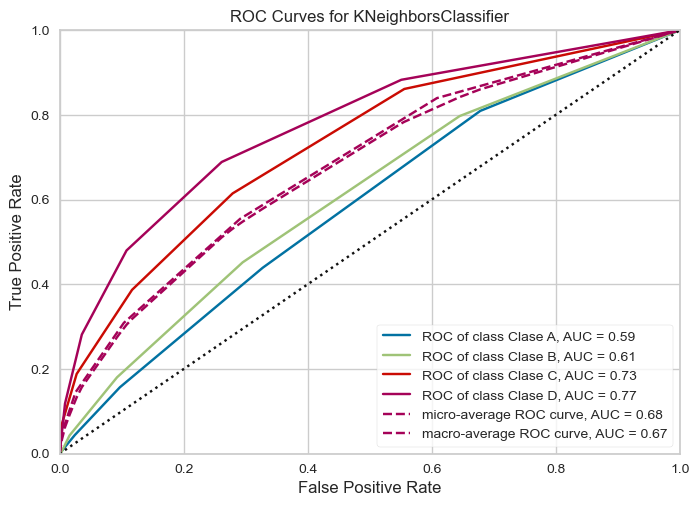

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'A': 'Clase A', 'B': 'Clase B', 'C': 'Clase C', 'D': 'Clase D'},
       estimator=KNeighborsClassifier())

In [108]:

plot_ROC_curve(KNeighborsClassifier(n_neighbors=5), X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [109]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_predict))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_predict))
print("-------------------------------------")
#print("Metricas para la categoría ", iris.target_names[0])
print("Precisión     : ", metrics.precision_score(y_test, y_predict, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_predict, labels=[0], average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[1:3,0])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_predict, labels=[0], average='macro'))


[[224 128 106 109]
 [207 189 128  58]
 [142 120 260  62]
 [158 104  69 344]]
Exactitud:  0.4223421926910299
Kappa    :  0.2306228606578804
-------------------------------------
Precisión     :  0.0
Recall        :  0.0
Especificidad :  0.6663479923518164
F1-score      :  0.0


C:\Users\CARLOS\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CARLOS\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [110]:
ks=[1,3,5,7,9,11,15,17]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Con K = ", k, ", exactitud: ", metrics.accuracy_score(y_test, y_pred))

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Con K =  1 , exactitud:  0.41445182724252494


C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Con K =  3 , exactitud:  0.4223421926910299


C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Con K =  5 , exactitud:  0.4223421926910299


C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Con K =  7 , exactitud:  0.41403654485049834


C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Con K =  9 , exactitud:  0.42317275747508304


C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Con K =  11 , exactitud:  0.4169435215946844


C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Con K =  15 , exactitud:  0.4065614617940199


C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Con K =  17 , exactitud:  0.4057308970099668


In [111]:
acc_train_vec=[]
acc_test_vec=[]
k_vec= np.arange(1,31,2)
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = knn.predict(X_test)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
print(acc_train_vec)
print(acc_test_vec)
print(k_vec)

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[1.0, 0.6689814814814815, 0.6002492877492878, 0.5737179487179487, 0.5471866096866097, 0.5341880341880342, 0.5217236467236467, 0.5137108262108262, 0.49928774928774927, 0.4886039886039886, 0.4805911680911681, 0.47150997150997154, 0.463497150997151, 0.4567307692307692, 0.45334757834757833]
[0.41445182724252494, 0.4223421926910299, 0.4223421926910299, 0.41403654485049834, 0.42317275747508304, 0.4169435215946844, 0.41320598006644516, 0.4065614617940199, 0.4057308970099668, 0.40282392026578073, 0.3974252491694352, 0.3974252491694352, 0.3903654485049834, 0.3841362126245847, 0.37832225913621265]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]


In [112]:
# Find the maximum value in the list
max_value = max(acc_test_vec)
# Find the index of the maximum value
max_index = acc_test_vec.index(max_value)
print(max(acc_test_vec))

print(k_vec[max_index])

0.42317275747508304
9


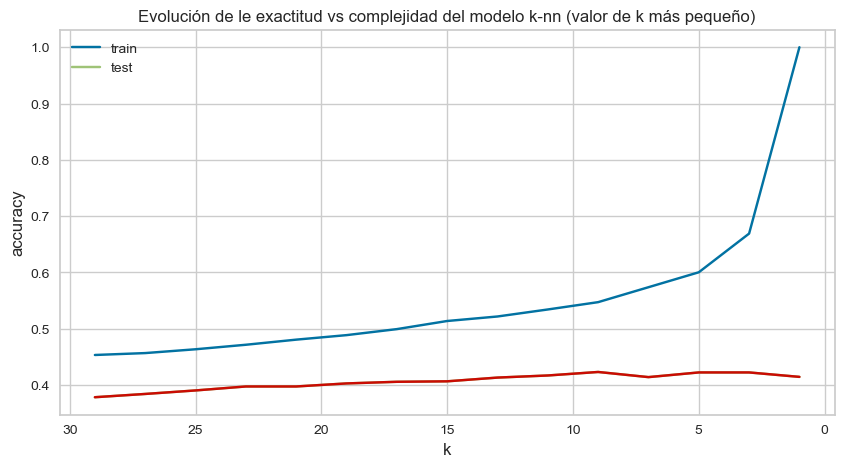

In [113]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

In [114]:
# Prueba con segun el mejor K es 9
k = 9
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Reporte Entrenamiento
              precision    recall  f1-score   support

           A       0.47      0.54      0.50      1394
           B       0.47      0.45      0.46      1272
           C       0.58      0.58      0.58      1375
           D       0.67      0.61      0.63      1575

    accuracy                           0.55      5616
   macro avg       0.55      0.54      0.54      5616
weighted avg       0.55      0.55      0.55      5616



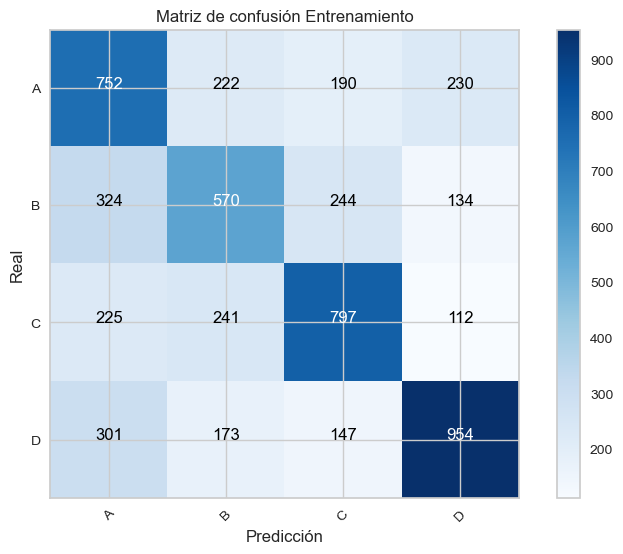

Reporte Prueba
              precision    recall  f1-score   support

           A       0.31      0.38      0.34       567
           B       0.34      0.31      0.32       582
           C       0.44      0.46      0.45       584
           D       0.60      0.53      0.56       675

    accuracy                           0.42      2408
   macro avg       0.42      0.42      0.42      2408
weighted avg       0.43      0.42      0.43      2408



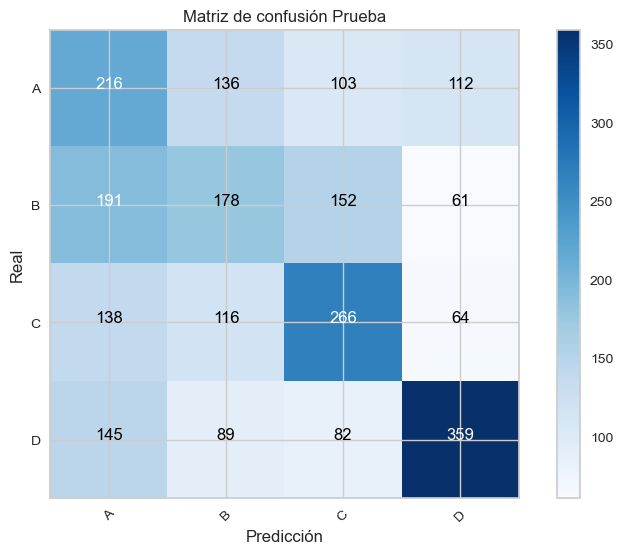

In [115]:
report_and_conf_matrix(KNeighborsClassifier(n_neighbors=k), X_train, X_test, y_train, y_test)

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


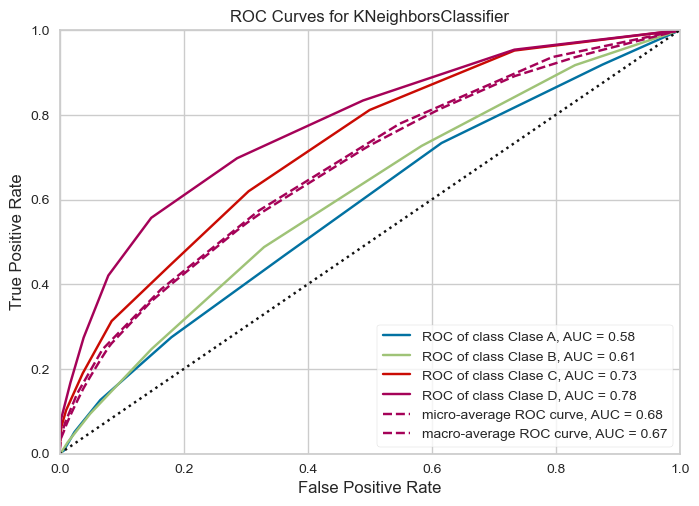

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'A': 'Clase A', 'B': 'Clase B', 'C': 'Clase C', 'D': 'Clase D'},
       estimator=KNeighborsClassifier(n_neighbors=9))

In [116]:
plot_ROC_curve(KNeighborsClassifier(n_neighbors=9), X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [117]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_predict))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_predict))
print("-------------------------------------")
#print("Metricas para la categoría ", iris.target_names[0])
print("Precisión     : ", metrics.precision_score(y_test, y_predict, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_predict, labels=[0], average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[1:3,0])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_predict, labels=[0], average='macro'))


[[216 136 103 112]
 [191 178 152  61]
 [138 116 266  64]
 [145  89  82 359]]
Exactitud:  0.42317275747508304
Kappa    :  0.23122864148587685
-------------------------------------
Precisión     :  0.0
Recall        :  0.0
Especificidad :  0.6839577329490875
F1-score      :  0.0


C:\Users\CARLOS\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CARLOS\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [118]:
#Probamos estandarizando pero no mejora , por el contrario empeora en test a 0.38

In [119]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
scores = cross_validate(knn, X_train, y_train, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f" % (key, score.mean()))
    
    

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

fit_time: 0.02
score_time: 0.19
test_accuracy: 0.41
test_precision_weighted: 0.41
test_recall_weighted: 0.41
test_f1_weighted: 0.41


<a id=7.2> </a> <br>

## <span style="background:gray; color:white">8.2 </span><span style="">Modelo de clasificacion Arboles de decision</span>

In [120]:
np.random.seed(1234)
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=None,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=2, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para 
    max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)

In [122]:
ctree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [123]:
y_pred = ctree.predict(X_test)
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

[[216 136 103 112]
 [191 178 152  61]
 [138 116 266  64]
 [145  89  82 359]]
Exactitud:  0.4563953488372093
Kappa    :  0.2741843971631206


Reporte Entrenamiento
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1394
           B       1.00      1.00      1.00      1272
           C       1.00      1.00      1.00      1375
           D       1.00      1.00      1.00      1575

    accuracy                           1.00      5616
   macro avg       1.00      1.00      1.00      5616
weighted avg       1.00      1.00      1.00      5616



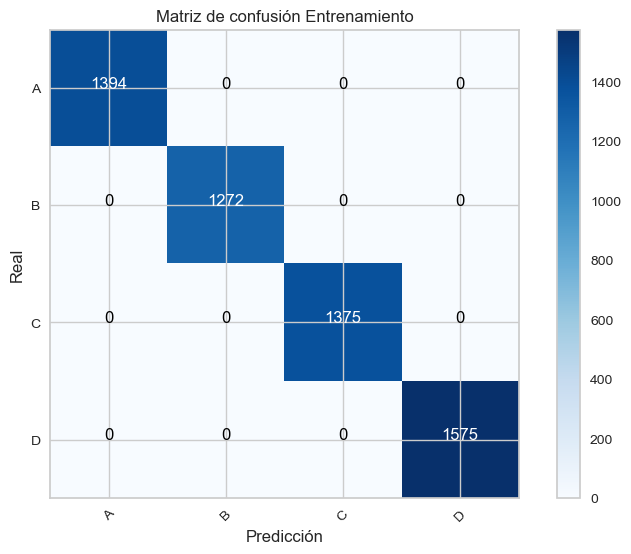

Reporte Prueba
              precision    recall  f1-score   support

           A       0.35      0.35      0.35       567
           B       0.35      0.33      0.34       582
           C       0.46      0.48      0.47       584
           D       0.60      0.60      0.60       675

    accuracy                           0.45      2408
   macro avg       0.44      0.44      0.44      2408
weighted avg       0.44      0.45      0.45      2408



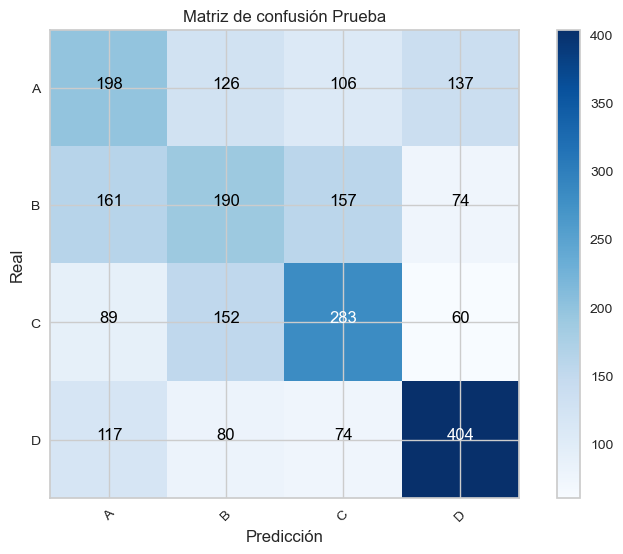

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


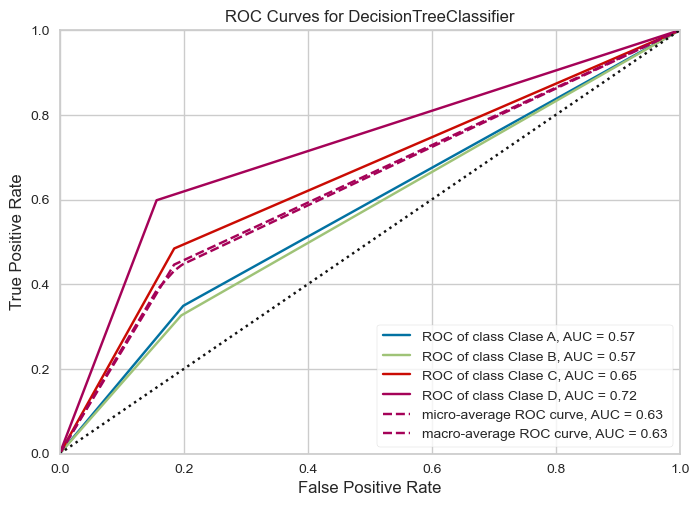

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'A': 'Clase A', 'B': 'Clase B', 'C': 'Clase C', 'D': 'Clase D'},
       estimator=DecisionTreeClassifier(criterion='entropy'))

In [124]:
report_and_conf_matrix(ctree, X_train, X_test, y_train, y_test)
plot_ROC_curve(ctree, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

<a id=7.3> </a> <br>

## <span style="background:gray; color:white">8.3 </span><span style="">Modelo de clasificacion por ensamble (Bagging - Arboles de decision)</span>

In [ ]:
np.random.seed(1234)
bagging = BaggingClassifier(base_estimator = ctree,   # Por defecto un decision tree 
                            n_estimators=200,          # Número de modelos a crear
                            max_samples=0.7,          # Número o % de registros de la muestra de aprendizaje
                            max_features=0.7,         # Número o % de atributos de la muestra de aprendizaje
                            bootstrap=True,           # Utilizar reemplazo en el muestreo de los registros de aprendizaje
                            bootstrap_features=False, # Utilizar reemplazo en el muestreo de los atributos de aprendizaje
                            oob_score=False,          # Evaluar cada modelo con los registros no utilizados en su aprendizaje 
                            n_jobs=2,                 # Número de cores a utilizar
                            random_state=None,        # random seed para el generador aleatorio
                            verbose=0)                # controla la cantidad de información a reportar


In [ ]:
np.random.seed(1234)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
cm= metrics.confusion_matrix(y_test, y_pred)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

<a id=7.4> </a> <br>

## <span style="background:gray; color:white">8.4 </span><span style="">Modelo de clasificacion por ensamble (Bagging - KNeighborsClassifier)</span>

In [ ]:
np.random.seed(1234)
bagging = BaggingClassifier(base_estimator = KNeighborsClassifier(),   # Por defecto un decision tree 
                            n_estimators=50,          # Número de modelos a crear
                            max_samples=0.5,          # Número o % de registros de la muestra de aprendizaje
                            max_features=0.5,         # Número o % de atributos de la muestra de aprendizaje
                            bootstrap=True,           # Utilizar reemplazo en el muestreo de los registros de aprendizaje
                            bootstrap_features=False, # Utilizar reemplazo en el muestreo de los atributos de aprendizaje
                            oob_score=False,          # Evaluar cada modelo con los registros no utilizados en su aprendizaje 
                            n_jobs=2,                 # Número de cores a utilizar
                            random_state=None,        # random seed para el generador aleatorio
                            verbose=0)                # controla la cantidad de información a reportar

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
cm= metrics.confusion_matrix(y_test, y_pred)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

In [ ]:
report_and_conf_matrix(BaggingClassifier(base_estimator = KNeighborsClassifier(),   # Por defecto un decision tree 
                            n_estimators=50,          # Número de modelos a crear
                            max_samples=0.5,          # Número o % de registros de la muestra de aprendizaje
                            max_features=0.5,         # Número o % de atributos de la muestra de aprendizaje
                            bootstrap=True,           # Utilizar reemplazo en el muestreo de los registros de aprendizaje
                            bootstrap_features=False, # Utilizar reemplazo en el muestreo de los atributos de aprendizaje
                            oob_score=False,          # Evaluar cada modelo con los registros no utilizados en su aprendizaje 
                            n_jobs=2,                 # Número de cores a utilizar
                            random_state=None,        # random seed para el generador aleatorio
                            verbose=0), X_train, X_test, y_train, y_test)
plot_ROC_curve(BaggingClassifier(base_estimator = KNeighborsClassifier(),   # Por defecto un decision tree 
                            n_estimators=50,          # Número de modelos a crear
                            max_samples=0.5,          # Número o % de registros de la muestra de aprendizaje
                            max_features=0.5,         # Número o % de atributos de la muestra de aprendizaje
                            bootstrap=True,           # Utilizar reemplazo en el muestreo de los registros de aprendizaje
                            bootstrap_features=False, # Utilizar reemplazo en el muestreo de los atributos de aprendizaje
                            oob_score=False,          # Evaluar cada modelo con los registros no utilizados en su aprendizaje 
                            n_jobs=2,                 # Número de cores a utilizar
                            random_state=None,        # random seed para el generador aleatorio
                            verbose=0)                # controla la cantidad de información a reportar
               , X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)